In [1]:
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../Data/train.csv', index_col=[0])
test = pd.read_csv('../Data/test.csv', index_col=[0])

In [3]:
Xtrain = pd.read_csv('../Data/New/XtrainNew.csv', index_col=[0])
Xtest = pd.read_csv('../Data/New/XtestNew.csv', index_col=[0])

In [4]:
Xtrain.head()

,0
0,really recommend anyone need new player
1,good every day camera fit nicely pocket jean t...
2,dollar dollar dvd player probably best
3,got phone yesterday find problem yet
4,price gb storage


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk as nlp
from nltk.corpus import stopwords

In [6]:
import re

def tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte t0do el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

In [7]:
# Obtain list of stopwords
stop_words = set(stopwords.words('english'))

In [8]:
Xtrain['text'] = train.text

In [9]:
Xtrain.iloc[1655,:]

0                 NaN
text    it has it all
Name: 1655, dtype: object

In [12]:
Xtrain.iloc[1655,0] = 'it has it all'

In [25]:
#Xtrain.drop([1655],inplace = True)
#train.drop([1655],inplace = True)

In [13]:
Xtrain

,0,text
0,really recommend anyone need new player,i really do recommend this to anyone in need o...
1,good every day camera fit nicely pocket jean t...,very good every day camera fits nicely in the ...
2,dollar dollar dvd player probably best,"but , dollar for dollar , this dvd player is p..."
3,got phone yesterday find problem yet,i got this phone yesterday and didn ' t find a...
4,price gb storage,1 ) price gb of storage
...,...,...
3011,itunes find good window medium player computer...,"as for itunes , i don ' t find it to be as goo..."
3012,played feature yet camera easy use get used,"i have not played with all the features yet , ..."
3013,application lot application work well eventual...,applications it has lots of applications and t...
3014,battery non issue,battery non issue


In [14]:
tfidf_vectorizador = TfidfVectorizer(tokenizer = tokenizar,  min_df = 2, stop_words = stop_words)
tfidf_vectorizador.fit(Xtrain['0'])

/Users/manugnzl/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                tokenizer=<function tokenizar at 0x7fb45431a790>)

In [15]:
Xtrain = tfidf_vectorizador.fit_transform(Xtrain['0'])
Xtest = tfidf_vectorizador.transform(Xtest['0'])

In [16]:
Ytrain = train.label

In [17]:
pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

,ability,able,absolute,absolutely,ac,acceptable,access,accessible,accessing,accessory,...,yes,yesterday,yet,yield,zealand,zen,zennx,zero,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.568211,0.454485,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.452703,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [20]:
models = []
models.append(('glm', LogisticRegression(random_state=99)))
models.append(('dectree', DecisionTreeClassifier(random_state=99)))
models.append(('rf', RandomForestClassifier(random_state=99)))
models.append(('gb', GradientBoostingClassifier(random_state=99)))
models.append(('xgb', XGBClassifier()))
models.append(('bag', BaggingClassifier(random_state=99)))
models.append(('svmr', SVC(random_state=99)))
models.append(('svml', SVC(kernel='linear', random_state=99)))


def boxplots_algorithms(results, names):
    plt.figure(figsize=(8, 8))
    plt.boxplot(results)
    plt.xticks(range(1, len(names) + 1), names)
    plt.show()

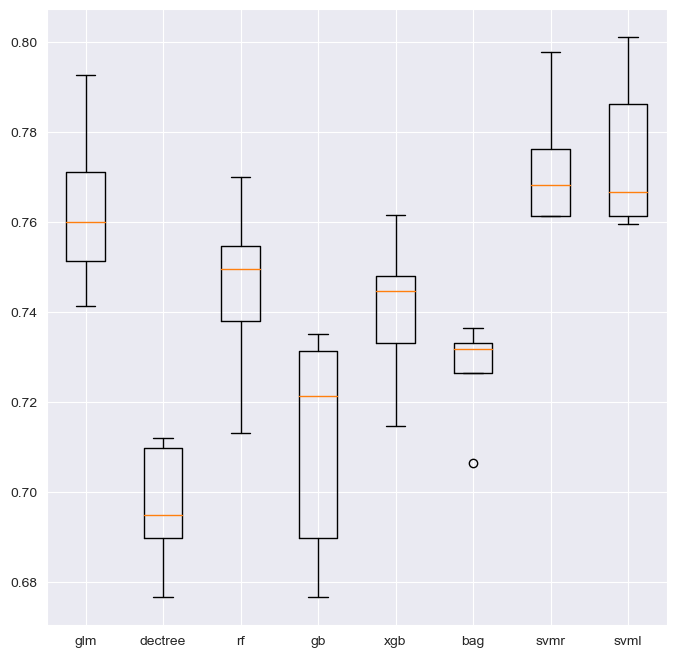

In [21]:
results = []
names = []

for name, model in models:
    acc = cross_val_score(model, Xtrain, Ytrain, cv=kf, scoring='accuracy')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)